Import libraries

In [3]:
import numpy as np
import wave
import warnings
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from scipy.io import wavfile

%matplotlib inline

warnings.filterwarnings('ignore')

open and read wav files

In [4]:
mix_wave_1 = wave.open('/content/111.wav', 'r')
mix_wave_2 = wave.open('/content/222.wav', 'r')
mix_wave_3 = wave.open('/content/333.wav', 'r')

get parameters of wav file

In [5]:
mix_wave_1.getparams()

_wave_params(nchannels=2, sampwidth=2, framerate=48000, nframes=240000, comptype='NONE', compname='not compressed')

get length of wav file in seconds

In [6]:
len_of_file = 264515/44100 # nframes / framerate
print(f"length of file in seconds : {len_of_file}")

length of file in seconds : 5.998072562358277


Extract no. of frames

In [7]:
def extract_frames(file):
  signal_raw = file.readframes(-1)
  signal = np.fromstring(signal_raw, 'int16')
  return signal

In [8]:
signal_1 = extract_frames(mix_wave_1)
signal_2 = extract_frames(mix_wave_2)
signal_3 = extract_frames(mix_wave_3)

check length of signal_1
if somehow len of file is showing 0 then restart your python kernel


In [9]:
len_of_signal_1 = len(signal_1)
print(f"length : {len_of_signal_1}") 

length : 480000


get timing of signal_1

In [10]:
def get_timing(file, signal):
  fs = file.getframerate()
  timing = np.linspace(0, len(signal)/fs, num=len(signal))
  return timing

In [11]:
timing_1 = get_timing(mix_wave_1, signal_1)
timing_2 = get_timing(mix_wave_2, signal_2)
timing_3 = get_timing(mix_wave_3, signal_3)

plot mix wave files

In [12]:
def plot_wave(timing, signal, title):
  plt.figure(figsize=(12 ,2))
  plt.title(title)
  plt.plot(timing, signal)
  plt.show()

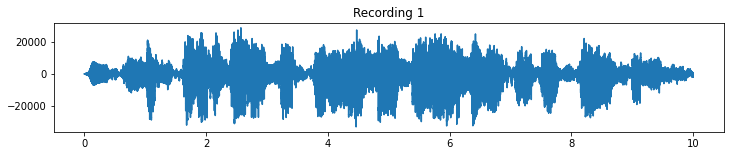

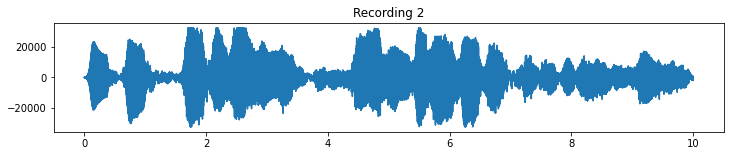

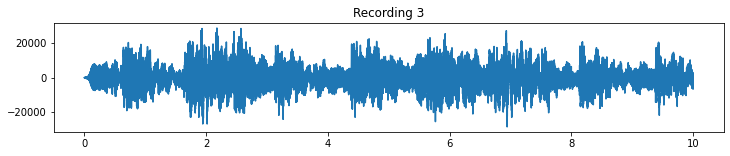

In [13]:
plot_wave(timing_1, signal_1, 'Recording 1')
plot_wave(timing_2, signal_2, "Recording 2")
plot_wave(timing_3, signal_3, 'Recording 3')

zip all the signal into single list

In [14]:
data =  list(zip(signal_1, signal_2, signal_3))

Data representation

In [15]:
data[:10]

[(-2, -2, -2),
 (10, 9, 10),
 (1, 1, 1),
 (12, 14, 12),
 (-5, -5, -5),
 (11, 8, 11),
 (0, 0, -1),
 (11, 16, 11),
 (-3, -3, -1),
 (10, 5, 11)]

initialise FastICA and fit and transform data

In [16]:
fastica = FastICA(n_components=3)
ica_result = fastica.fit_transform(data)

print the shape of result

In [17]:
ica_result.shape

(480000, 3)

split signals

In [18]:
result_signal_1 = ica_result[:, 0]
result_signal_2 = ica_result[:, 1]
result_signal_3 = ica_result[:, 2]

function to plot individual components

In [19]:
def plot_result_signal(result_signal, title):
  plt.figure(figsize=(12, 2))
  plt.title(title)
  plt.plot(result_signal)
  plt.ylim(-0.010, 0.010)
  plt.show()

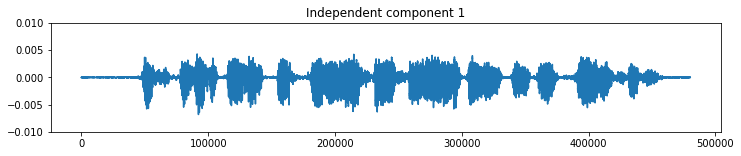

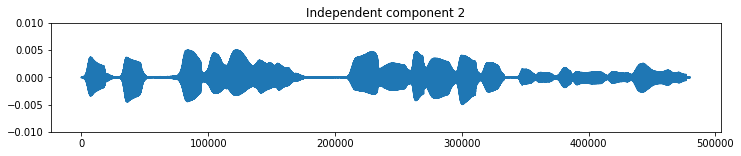

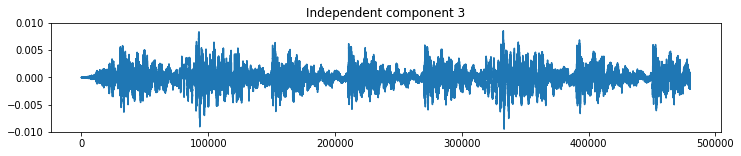

In [20]:
plot_result_signal(result_signal_1, "Independent component 1")
plot_result_signal(result_signal_2, "Independent component 2")
plot_result_signal(result_signal_3, "Independent component 3")

convert signal to int16

In [21]:
def convert_to_int16(result_signal, fs, filename):
  result_signal_int = np.int16(result_signal * 32767 * 100)
  wavfile.write(filename, fs, result_signal_int)
     

get framerate

In [22]:
fs_1 = mix_wave_1.getframerate()
fs_2 = mix_wave_2.getframerate()
fs_3 = mix_wave_3.getframerate()

convert back to wav

In [23]:
convert_to_int16(result_signal_1, fs_1, "result_wav_11.wav")
convert_to_int16(result_signal_2, fs_2, "result_wav_22.wav")
convert_to_int16(result_signal_3, fs_3, "result_wav_33.wav")

checking similarity in the audio files

In [24]:
import librosa
import math
import numpy as np
import librosa.display
import matplotlib.pyplot as plt
!pip install dtw
!pip install dtaidistance
from dtw import dtw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for dtw: filename=dtw-1.4.0-py3-none-any.whl size=5314 sha256=6ae32753807f2b0570be13a45b9888f8fb45e72e6aa63c9063576974a44e44a5
  Stored in directory: /root/.cache/pip/wheels/5b/cc/44/62f60769f89e834ab2124c69de4005c771e0ff06af908bbbf3
Successfully built dtw
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.4 MB 6.2 MB/s 


In [26]:
y1, sr1 = librosa.load('/content/1FJ.wav') 
y2, sr2 = librosa.load('/content/result_wav_22 (1) (mp3cut.net).wav')

In [27]:
mfcc1 = librosa.feature.mfcc(y1,sr1)
mfcc2 = librosa.feature.mfcc(y2, sr2)

distance between audio signals

In [29]:
from dtaidistance import dtw_ndim
d1 = dtw_ndim.distance(mfcc1.T, mfcc2.T)
blockAmplitude = np.sum(np.absolute(mfcc1.T))
print(d1/blockAmplitude)

0.013960346924286746
